Wahlpflichtfach Künstliche Intelligenz I: Testat

---

# 01 - Testat zu den Modulen NumPy, matplotlib und pandas
__Gruppennummer:__ 1

__Mitglieder:__
- Lena Awe
- Leni Lakebrink
- Jannes Teupen
- Lucas Weihermann
- Jakob Zoll

In [372]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Seit dem letzten Testat haben Sie die drei Module NumPy, matplotlib und pandas kennengelernt. In diesem Testat werden Sie diese Module zum Lösen von unterschiedlichen Aufgaben verwenden. Sie werden Daten aufbereiten und visualisiern sowie mit NumPy Berechnungen durchführen um ein Klassifikationsproblem zu lösen.

## Aufgabe 1: Daten aufbereiten und visualisieren (5 Punkte)
In der ersten Aufgabe werden Sie das Ebola-Datenset, das Ihnen aus der Vorlesung bereits bekannt ist, aufbereiten und anschließend visualisieren. Dabei gibt es die folgenden Teilaufgaben:
- a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
- b) Implementierung der Ersetzungsstrategie(n)
- c) Überprüfen, ob alle fehlenden Werte ersetzt wurden
- d) Schnelle Visualisierung mit pandas
- e) Visualisierung mit matplotlib

#### a) Auswahl der Strategie(n) zum Ersetzen der fehleden Werte
_Punkte: 1,5_

In der nachfolgenden Codezeile wird das Ebola-Datenset als pandas.DataFrame importiert.

In [373]:
ebola = pd.read_csv('ebola.csv')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Überlegen Sie sich eine Strategie, wie die fehlenden Werte sinnvoll ersetzt werden können. Beschreiben Sie ihre Strategie in der folgenden Markdown-Zeile und begründen Sie, warum Sie diese Strategie(n) gewählt haben.

_Tipps:_
- Wenn Sie nicht mehr wissen, wie das Dataset aufgebaut ist, machen Sie sich wieder damit vertraut (z.B. `describe()`, sich einzelne Zeilen angucken).
- Verschaffen Sie sich ein Überblick über die Möglichkeiten zum Ersetzen von fehlenden Werten, die es in pandas gibt (z.B. `fillna`, `interpolate`).

__Ihre Antwort:__ Um die fehlenden Werte zu Ersetzen soll interpolate verwendet werden um basierende auf einer quadratischen Verteilung fehlende Werte zu berechnen. Dabei soll auf natürliche Zahlen gerundet werden. Missing values am Anfang und Ende der Spalten werden mit ffill und bfill befüllt. Dafür haben wir uns entschieden, weil wir davon ausgehen, dass die Werte zeitlich zusammenhängen und wenige signifikanten Sprünge vorliegen.

#### b) Implementierung der Ersetzungsstrategie(n)
_Punkte: 1_

Implementieren Sie die von Ihnen ausgewählte Strategie(n) zum Ersetzen der fehlenden Werte. Speichern Sie das DataFrame ohne fehlende Werte in der Variable `ebola_without_nans`.

In [374]:
# IHRE Lösung HIER
ebola_without_nans = ebola.interpolate(method='quadratic').bfill().ffill().round(0)
ebola_without_nans

/tmp/ipykernel_2429/3659022911.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ebola_without_nans = ebola.interpolate(method='quadratic').bfill().ffill().round(0)


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2753.0,8157.0,9712.0,20.0,1.0,4.0,1.0,7.0,1757.0,3496.0,2880.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


#### c) Überprüfen, ob alle fehlenden Werte ersetzt wurden
_Punkte: 0,5_

Nachdem die fehlenden Werte ersetzt wurden, ist es sinnvoll zu prüfen, ob auch wirklich alle fehlenden Werte ersetzt wurden. Nutzen Sie dafür bitte den folgenden Methodenrumpf:
```python
def has_no_nans(df):
    
    return False
```

Der Input-Parameter `df` ist das DataFrame, dass überprüft werden soll. Der Rückgabewert ist `True`, wenn das DataFrame keine fehlenden Werte mehr enthält. Andernfalls wird `False`zurückgegeben.

In [375]:
def has_no_nans(df):
    return not df.isnull().values.any()

In [376]:
if has_no_nans(ebola_without_nans):  # 
    print('Sehr gut! Wir können mit den Daten jetzt weiterarbeiten.')
else: 
    print('Die von Ihnen ausgewählte Strategie hat nicht geklappt. Versuchen Sie es nochmal.')

Sehr gut! Wir können mit den Daten jetzt weiterarbeiten.


#### d) Schnelle Visualisierung mit pandas
_Punkte: 0,5_

Häufig können mit pandas erste schnelle Graphen erstellt werden, um einen guten, ersten Eindruck über die Datenverteilung zu erhalten. Erstellen Sie mit Hilfe von pandas einen Graphen, der die Fälle und Todesfälle in Guinea im Laufe der Zeit visualisiert. Vergessen Sie nicht, die Achsen zu beschriften.

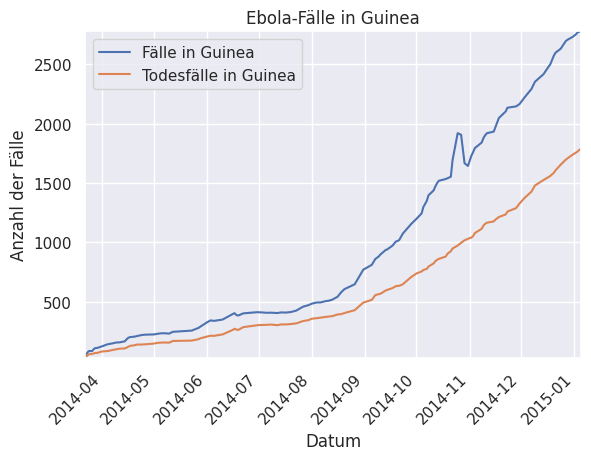

In [377]:
# IHRE Lösung HIER
ebola_without_nans['Datetime'] = pd.to_datetime(ebola_without_nans['Date'])
ebola_without_nans.set_index('Datetime')[['Cases_Guinea', 'Deaths_Guinea']].plot()

plt.margins(x=0, y=0)
plt.xticks(rotation=45)
plt.xlabel('Datum')
plt.ylabel('Anzahl der Fälle')
plt.title('Ebola-Fälle in Guinea')
plt.legend(labels=['Fälle in Guinea', 'Todesfälle in Guinea'])

plt.show()

#### e) Visualisierung mit matplotlib
_Punkte: 1,5_

Auch wenn pandas und andere Plotting-Module viele Graphen von sich aus erstellen können, gibt es Fälle, wo diese Graphen mittels matplotlib indivdualisiert werden sollen oder wo die "Standard"-Graphen nicht ausreichen. Daher ist es immer noch ein wichtiger Skill, Graphen nur mit matplotlib erstellen zu können. In dieser Teilaufgabe werden Sie genau dies tun. Dazu gibt es die folgende Beschreibung:
- Für die Todesfälle und Fälle soll es jeweils einen eigenen Graphen geben
- In beiden Graphen sollen die Informationen der Länder Guinea, Liberia und Sierra Leone enthalten sein
- Außerdem sollen die kumulierten Fälle bzw. Tode in jedem Graph enthalten sein
- Achten Sie darauf, dass alles beschriftet ist

/tmp/ipykernel_2429/1015072207.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


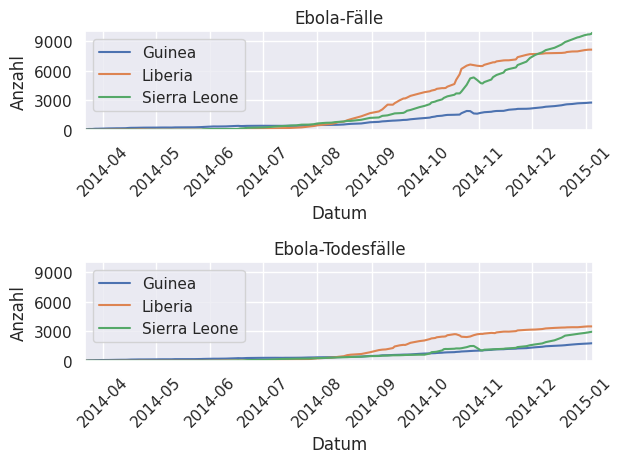

In [378]:
# IHRE Lösung HIER
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.set(title="Ebola-Fälle")
ax1.plot(ebola_without_nans.set_index('Datetime')[['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone']])
ax1.tick_params(axis="x", rotation=45)
ax1.legend(labels=['Guinea', 'Liberia', 'Sierra Leone'], loc='upper left')
ax1.yaxis.set_major_locator(plt.MultipleLocator(3000))
ax1.margins(x=0, y=0)
ax1.xaxis.set_label_text('Datum')
ax1.yaxis.set_label_text('Anzahl')

ax2.set(title="Ebola-Todesfälle")
ax2.plot(ebola_without_nans.set_index('Datetime')[['Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone']])
ax2.tick_params(axis="x", rotation=45)
ax2.legend(labels=['Guinea', 'Liberia', 'Sierra Leone'], loc='upper left')
ax2.yaxis.set_major_locator(plt.MultipleLocator(3000))
ax2.margins(x=0, y=0)
ax2.set_ylim(0, 10000)
ax2.xaxis.set_label_text('Datum')
ax2.yaxis.set_label_text('Anzahl')

fig.tight_layout()
fig.show()

## Aufagbe 2: Arbeiten mit DataFrames (3 Punkte)
In dieser Aufgabe werden Sie verschiedene Methoden von pandas bzw. pandas.DataFrame verwenden um Anforderungen zu lösen. Als Daten verwenden wir hier ein Datenset, das Informationen über alle Länder der Welt enthält. Sie können das Datenset [hier](https://www.kaggle.com/fernandol/countries-of-the-world) finden. Die Teilaufgaben sind:
- a) Speicheroptimierung
- b) Änderung von Datenskalen
- c) Finden der Länder mit dem höchsten BIP pro Region

In [379]:
countries = pd.read_csv('countries.csv')
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


#### a) Speicheroptimierung
_Punkte: 1_

Inspizieren Sie die Daten. Welche Daten lassen sich effektiver speichern? Schreiben Sie die von Ihnen gefundene(n) Spalte(n) in die nachfolgende Markdown-Zeile und begründen Sie kurz, warum sich diese Spalte effektiver speichern lässt.

__Ihre Antwort:__ <br>
- Country: Einzigartige Werte, keine Optimierung möglich
- Region: Einteilung in kategorische Daten (pd.Series) spart Platz
- Population: int32 (1,3 Mrd. größter Wert im Datensatz)
- Area: int32 (17 Mio. größter Wert)
- Pop. Density: float32 (16 Tsd. größter Wert) ausreichende Genauigkeit
- Coastline: float16 (nur bis 870)
- Net Migration: float16 (nur bis 870)
- Infant Mortality: float16 (nur bis 200)
- GDP: Int32 (bis 57.000, großes **I**nt, da NaN vorhanden)
- Literacy: float16 (Prozentzahl)
- Phones: float16 (bis 1080)
- Arable: float16 (Prozentzahl)
- Crops: float16 (Prozentzahl)
- Other: float16 (Prozentzahl)
- Climate: kategorische Daten (pd.Series)
- Birthrate: float16 (zweistellige Werte)
- Deathrate: float16 (zweistellige Werte)
- Argiculture: float16 (nur drei Nachkommastellen)
- Industry: float16 (nur drei Nachkommastellen)
- Service: float16 (nur drei Nachkommastellen)

Wandeln Sie die von Ihnen gefundene(n) Spalte(n) in der folgenden Codezeile um.

In [380]:
# IHRE Lösung HIER
#print(countries.info(memory_usage="deep"))
print(countries.memory_usage(deep=True).sum())

countries['Region'] = countries['Region'].astype('category')
countries['Population'] = countries['Population'].astype('int32')
countries['Area (sq. mi.)'] = countries['Area (sq. mi.)'].astype('int32')
countries['Pop. Density (per sq. mi.)'] =  countries['Pop. Density (per sq. mi.)'].str.replace(',', '.').astype('float32')
countries['Coastline (coast/area ratio)'] = countries['Coastline (coast/area ratio)'].str.replace(',', '.').astype('float16')
countries['Net migration'] = countries['Net migration'].str.replace(',', '.').astype('float16')
countries['Infant mortality (per 1000 births)'] = countries['Infant mortality (per 1000 births)'].str.replace(',', '.').astype('float32')
countries['GDP ($ per capita)'] = countries['GDP ($ per capita)'].astype('Int32')
countries['Literacy (%)'] = countries['Literacy (%)'].str.replace(',', '.').astype('float16')
countries['Phones (per 1000)'] = countries['Phones (per 1000)'].str.replace(',', '.').astype('float16')
countries['Arable (%)'] = countries['Arable (%)'].str.replace(',', '.').astype('float16')
countries['Crops (%)'] = countries['Crops (%)'].str.replace(',', '.').astype('float16')
countries['Other (%)'] = countries['Other (%)'].str.replace(',', '.').astype('float16')
countries['Climate'] = countries['Climate'].astype('category')
countries['Birthrate'] = countries['Birthrate'].str.replace(',', '.').astype('float16')
countries['Deathrate'] = countries['Deathrate'].str.replace(',', '.').astype('float16')
countries['Agriculture'] = countries['Agriculture'].str.replace(',', '.').astype('float16')
countries['Industry'] = countries['Industry'].str.replace(',', '.').astype('float16')
countries['Service'] = countries['Service'].str.replace(',', '.').astype('float16')

#print(countries.info(memory_usage="deep"))
print(countries.memory_usage(deep=True).sum())

215784
25844


#### b) Änderung von Datenskalen
_Punkte: 1_

Die Skalen der Spalten _Area (sq. mi.)_ und _Pop. Density (per sq. mi.)_ verwenden Quadratmeilen. Da dies für uns Europäer eine komische Skala ist, sollen Sie den Wert in Quadratkilometer umrechnen (1 Quadratkilometer = 0,386102 Quadratmeilen). Implementieren Sie den folgenden Methodenrumpf:
```python
def sq_mi_in_sq_km(series):
    
    return series
```
Der Input-Parameter `series` ist ein pandas.Series-Objekt, das die umzurechenden Werte enthält. Der Rückgabewert ist auch ein pandas.Series-Objekt, das die Werte in Quadratkilometer enthält. 

Wenden Sie anschließend die Methode auf die Spalten an und ändern Sie den Namen der betroffenden Spalten.

In [381]:
# IHRE Lösung HIER
def sq_mi_in_sq_km(series):
    return series / 0.386102

countries['Area (sq. km.)'] = sq_mi_in_sq_km(countries['Area (sq. mi.)'])
countries['Pop. Density (per sq. km.)'] = sq_mi_in_sq_km(countries['Pop. Density (per sq. mi.)'])

#countries[['Area (sq. km.)', 'Area (sq. mi.)']]
#countries[['Pop. Density (per sq. km.)', 'Pop. Density (per sq. mi.)']]

#### c) Finden der Länder mit dem höchsten BIP (GDP) pro Region
Geben Sie ein DataFrame aus, das das Land einer jeden Region enthält, welches den höchsten BIP aufweist. Das DataFrame soll die spalten Region, Land und BIP enthalten. 

In [382]:
# IHRE Lösung HIER
countries.loc[countries.groupby('Region')['GDP ($ per capita)'].idxmax()][['Region', 'Country', 'GDP ($ per capita)']]

/tmp/ipykernel_2429/3425335618.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  countries.loc[countries.groupby('Region')['GDP ($ per capita)'].idxmax()][['Region', 'Country', 'GDP ($ per capita)']]


,Region,Country,GDP ($ per capita)
91,ASIA (EX. NEAR EAST),Hong Kong,28800
64,BALTICS,Estonia,12300
169,C.W. OF IND. STATES,Russia,8900
186,EASTERN EUROPE,Slovenia,19000
38,LATIN AMER. & CARIB,Cayman Islands,35000
212,NEAR EAST,United Arab Emirates,23200
205,NORTHERN AFRICA,Tunisia,6900
214,NORTHERN AMERICA,United States,37800
11,OCEANIA,Australia,29000
133,SUB-SAHARAN AFRICA,Mauritius,11400


## Aufgabe 3: Baue ein Klassifikator mit NumPy (2 Punkte)
In der letzten Aufgabe werden Sie einen Klassifikator bauen. Betrachten Sie sich zunächst den folgenden Graphen:

In [383]:
import seaborn as sns

sns.set_theme()

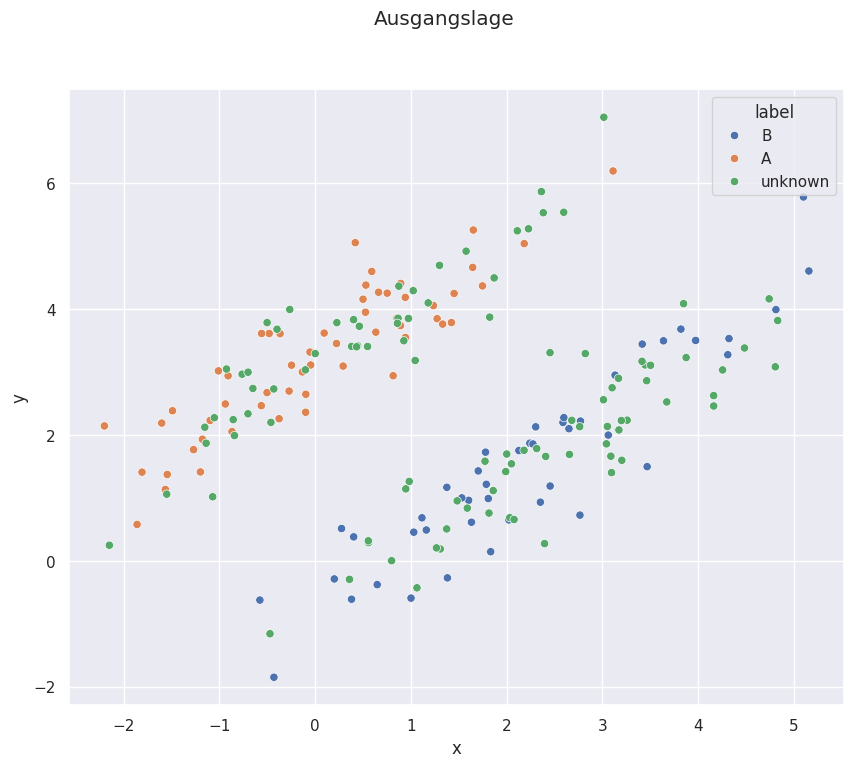

In [384]:
classification_data = pd.read_csv('classification_data.csv', index_col=0)

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Ausgangslage')
sns.scatterplot(x=classification_data.x, y=classification_data.y, hue=classification_data.label)  # noqa: F821
plt.show()

Der Graph zeigt zwei Punktewolken - eine für das Label _A_ und eine für das Label _B_ - die linear separierbar sind. Allerdings ist noch nicht jedem Datenpunkt ein Label zugewiesen. Dies ist Ihre Aufgabe. Dafür führen Sie bitte die folgenden Schritte durch:
- a) Bestimmen Sie die Trennlinie
- b) Implementieren Sie den Klassifikator

#### a) Bestimmen Sie die Trennlinie
_Punkte: 0,5_

Da die Daten durch eine einfache gerade Linie trennbar sind, kann man diese Eigenschaft nutzen, um einen Klassifikator zu bauen. Dabei wird jedem Wert der größer ist als die Linie ein Label zugewiesen und jedem Wert der kleiner ist als die Linie das andere Label. Daher ist Ihre erste Aufgabe diese Linie zu bestimmen. Geben Sie dafür in der nachfolgenden Zeile die nötigen x- und y-Koordinaten von zwei Punkten am jeweiligen Ende dieser Linie an, die benötigt werden, um die Linie zu ploten.

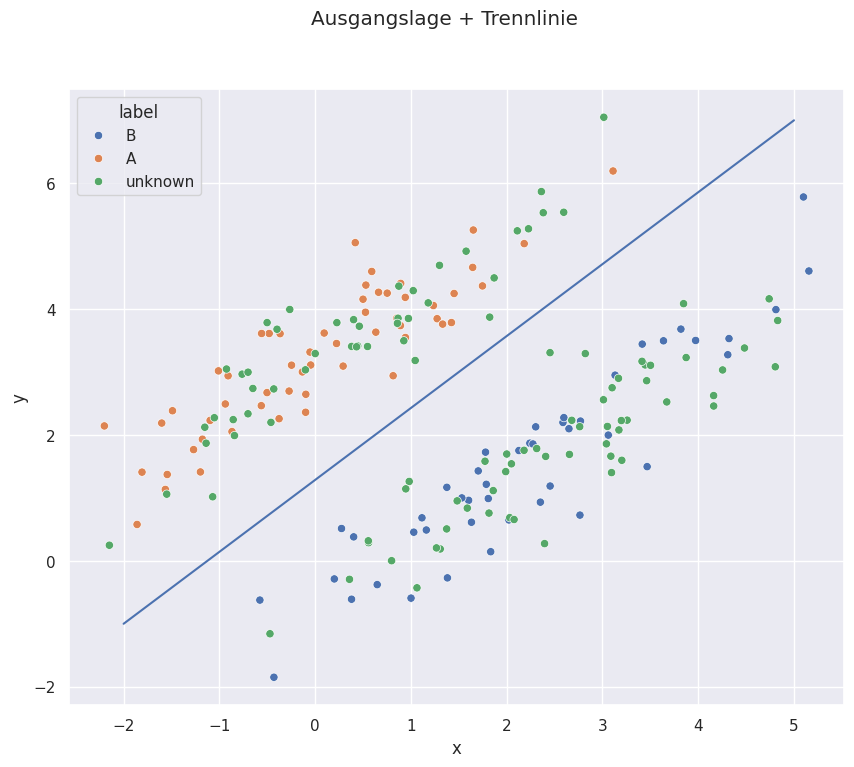

In [385]:
x = [-2, 5] # IHRE Lösung HIER
y = [-1, 7] # IHRE Lösung HIER

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Ausgangslage + Trennlinie')
sns.scatterplot(x=classification_data.x, y=classification_data.y, hue=classification_data.label)  # noqa: F821
plt.plot(x, y)
plt.show()

#### b) Implementieren Sie den Klassifikator
_Punkte: 1,5_

Nun können Sie den Klassifikator implementieren. Nutzen Sie dafür den folgenden Methodenrumpf und NumPy-Methoden:
```python
def classify(data):
    
    return labels
```
Der Input-Parameter ist ein NumPy 2d-Array mit 2 Spalten und beliebig vielen Zeilen. Der Rückgabewert ist ein NumPy 1d-Array in der Länge des Input Arrays, dass für jeden Datenpunkt, das entsprechende Label enthält.

In [386]:
def classify(data):
    labels = []
    for point in data:
        labels.append('A' if point[1] >= (8/7) * point[0] + (8/7) else 'B')
    return labels

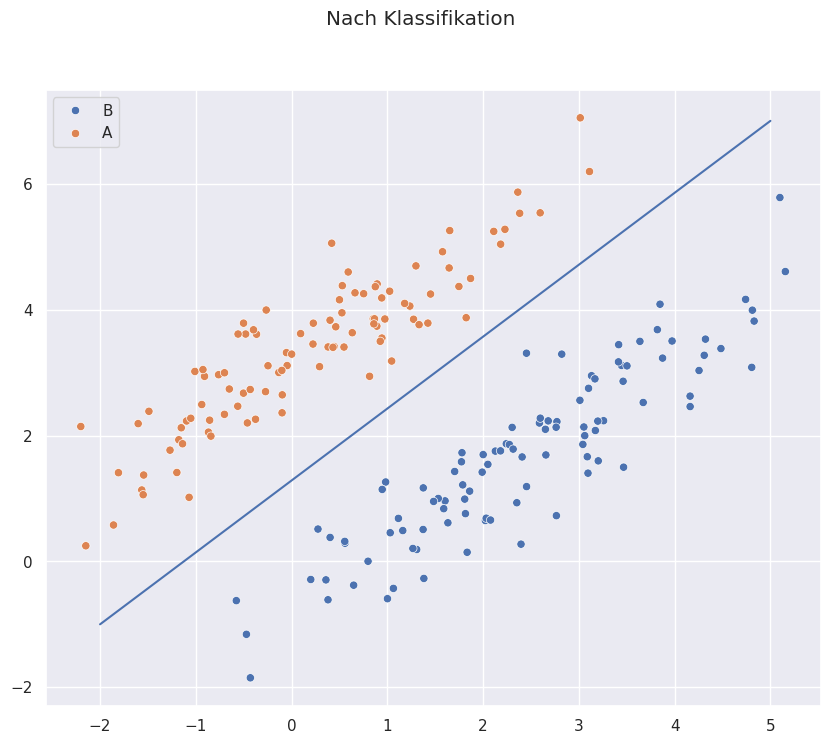

In [387]:
known_data = classification_data.loc[classification_data.label != 'unknown']  # noqa: F821
unknown_data_points = classification_data.loc[classification_data.label == 'unknown', 'x':'y'].values  # noqa: F821
labels_for_unknown_data = classify(unknown_data_points)

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Nach Klassifikation')
sns.scatterplot(x=np.append(known_data.x.values, unknown_data_points[:, 0]), 
                y=np.append(known_data.y.values, unknown_data_points[:, 1]),
                hue=np.append(known_data.label.values, labels_for_unknown_data))
plt.plot(x, y)
plt.show()

---

Wahlpflichtfach Künstliche Intelligenz I: Testat